### Корреляционный анализ данных. Интерпретация результатов и основные принципы применения.

**Корреляция** — это взаимосвязь между двумя переменными, при которой изменение одной из них сопровождается изменением в другой.  
**Корреляционный анализ** – статистический метод, позволяющий с использованием коэффициентов корреляции определить, существует ли зависимость между переменными и насколько она сильна.  
Характер связи между переменными обладает следующими свойствами:  
- Форма (линейная/нелинейная). Для определения формы связи используется диаграмма рассеяния.  
- Сила (сильная связь/средняя связь/слабая связь/отсутствие связи). Силу взамосвязи определяет абсолютное значение коэффициента корреляции:  
       до 0,2 - корреляции нет  
       до 0,5 - слабая корреляция  
       до 0,7 - средняя корреляция  
       до 1 - высокая корреляция  
- Направление (прямая/обратная). Направление определяется по знаку коэффициента корреляции: "+" - прямая, "-" - обратная.  
- Вид (прямая связь/связь, вызванная скрытой переменной/связь, вызванная несколькими скрытыми переменными/связи нет). При рассмотрении данного фактора важно понимать характер взаимодействия: влияет ли одна переменная на другую непосредственно или влияние вызвано причинно-следственной связью. За счет эффектов одновременного влияния неучтенных факторов смысл истинной связи может искажаться, поэтому такую корреляцию часто называют **«ложной».** Для ее выявления используют частные коэффициенты корреляции. Например, продажи мороженного тесно коррелируют с числом лесных пожаров. При этом мы не может утвержать, что если завтра продажи мороженного вырастут в 10 раз, то и число лесных пожаров возрастет прямопропорционально. На данную связь влияет скрытая переменная - температура, которая и увеличивает продажи мороженного с числом лесных пожаров.      

[![2024-11-23-22-34-23.png](https://i.postimg.cc/vTTZfQJf/2024-11-23-22-34-23.png)](https://postimg.cc/7Jv4yyYZ)

Для анализа связи в большинстве случаев используются следующие коэффифиенты корреляции:  
1. **Пирсона** (параметрический коэффициент, который используется для непрерывных переменных и оценивает только линейную связь)  
2. **Спирмена** (непараметрический коэффициент, используется для ранговых, интервальных и непрерывных переменных)  
3. **Кендалла** (аналогично коэффициенту Спирмена, используется если в данных есть выбросы)  
Но также существуют и другие методы, представленные в таблице ниже:  

[![2024-11-25-20-59-48.png](https://i.postimg.cc/3wXncv8z/2024-11-25-20-59-48.png)](https://postimg.cc/VSNqS5bF)  

Рассмотрим на примере процесс анализа корреляций для различных типов переменных:

In [1]:
import pandas as pd # Импортируем библиотеки для работы с даннми
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df=pd.read_csv('laptop_price - dataset.csv') # Загружаем датасет с характеристиками различных ноутбуков
# Подробное описание данных: https://www.kaggle.com/datasets/ironwolf437/laptop-price-dataset
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


### Анализ корреляции числовых признаков

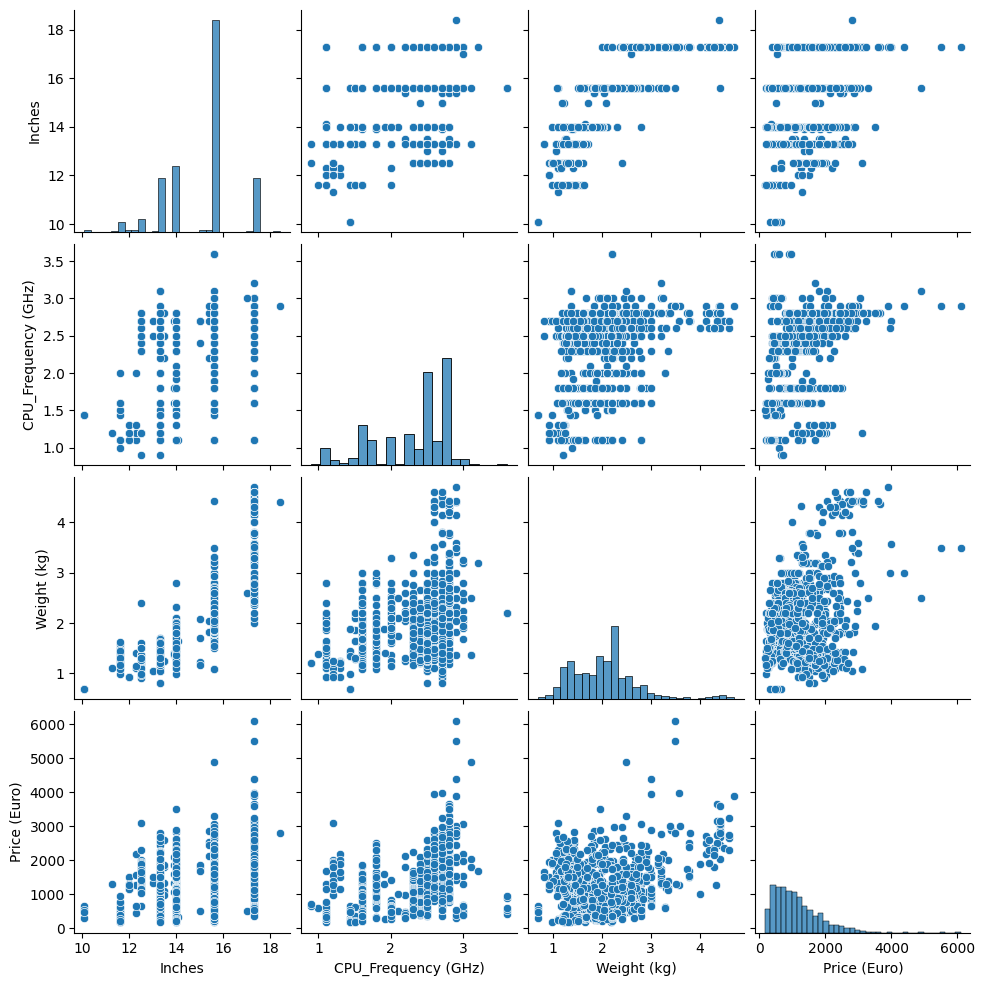

In [2]:
# Рассмотрим визуальную связь числовых переменных при помощи функции pairplot
sns.pairplot(df[['Inches', 'CPU_Frequency (GHz)', 'Weight (kg)', 'Price (Euro)']])
# Данная функция строит матрицу с диаграммами рассеяния для каждой пары переменных, по диагонали располагаются гистограммы

In [3]:
# Для построения матрицы корреляций Пирсона используется функция .corr()
df[['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)', 'Price (Euro)']].corr()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
Inches,1.000000,0.305037,0.241078,0.826638,0.066608
CPU_Frequency (GHz),0.305037,1.000000,0.366254,0.318649,0.428847
RAM (GB),0.241078,0.366254,1.000000,0.389370,0.740287
Weight (kg),0.826638,0.318649,0.389370,1.000000,0.211883
Price (Euro),0.066608,0.428847,0.740287,0.211883,1.000000


<Axes: >

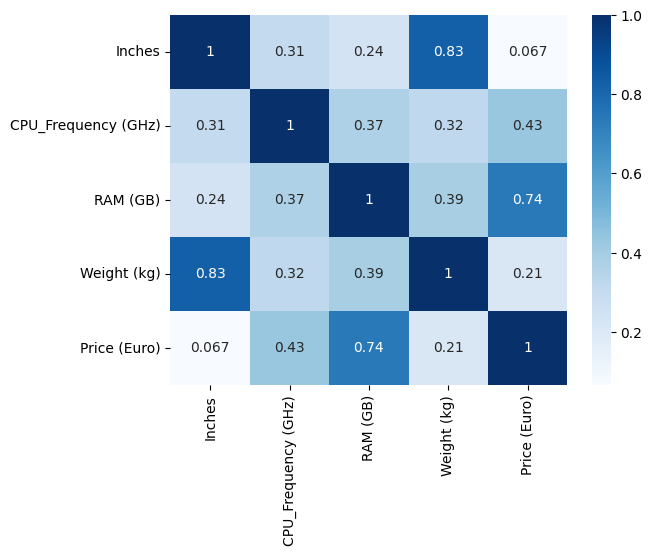

In [4]:
# Визуализируем полученную матрицу методом heatmap
sns.heatmap(df[['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)', 'Price (Euro)']].corr(), annot=True, cmap="Blues")
# Можем заметить сильную корреляцию между диагональю экрана и весом, а также оперативной памятью и стоимостью

In [5]:
# Для подтверждения корреляции необходимо проверить значимость коэффициента корреляции, т.е. убедиться вызвана ли зависимость случайностью, либо является закономерностью
# Проверяем гипотезу Н0: r = 0 (коэффициент корреляции нулевой, зависимости нет), Н1: r != 0; уровень значимости = 0,05
from scipy.stats import pearsonr, spearmanr # Испортируем методы для проверки
r = pearsonr(df['Weight (kg)'], df['Inches']) # Рассчитываем коэффициент Пирсона при помощи метода pearsonr, который принимает две переменные
print('Коэффициент корреляции Пирсона между весом и диагональю ноутбука:', r[0], 'p-value:', r[1])
# p-value оказалось меньше уровня значимости, поэтому делаем вывод о статистической значимости коэффициента корреляции, т.е. нет оснований принимать нулевую гипотезу

Коэффициент корреляции Пирсона между весом и диагональю ноутбука: 0.8266379625499107 p-value: 3.6986e-320


In [6]:
# Проверим значимость связи между стоимостью ноутбука и его оперативной памятью
r = pearsonr(df['Price (Euro)'], df['RAM (GB)'])
print('Коэффициент корреляции Пирсона между стоимостью ноутбука и памятью:', r[0], 'p-value:', r[1])
# p-value меньше уровня значимости, следовательно данная связь является статистически значимой

Коэффициент корреляции Пирсона между стоимостью ноутбука и памятью: 0.7402865271622752 p-value: 9.132905716046373e-222


In [7]:
# Мы могли бы смело утверждать о наличии взаимосвязи между весом и диагональю, стоимостью и паматью, если бы проверили данные на нормальность перед расчетом коэффициента Пирсона
# Так как данной проверки не было, полагаться на результаты нельзя
# Перепроверим их при помощи коэффициента Спирмена
df[['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)', 'Price (Euro)']].corr(method='spearman')
# Матрица рассчитывается при помощи функции .corr() с параметром method='spearman'

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
Inches,1.000000,0.292475,0.153507,0.879324,-0.049101
CPU_Frequency (GHz),0.292475,1.000000,0.496268,0.329812,0.526273
RAM (GB),0.153507,0.496268,1.000000,0.189691,0.764248
Weight (kg),0.879324,0.329812,0.189691,1.000000,-0.025026
Price (Euro),-0.049101,0.526273,0.764248,-0.025026,1.000000


<Axes: >

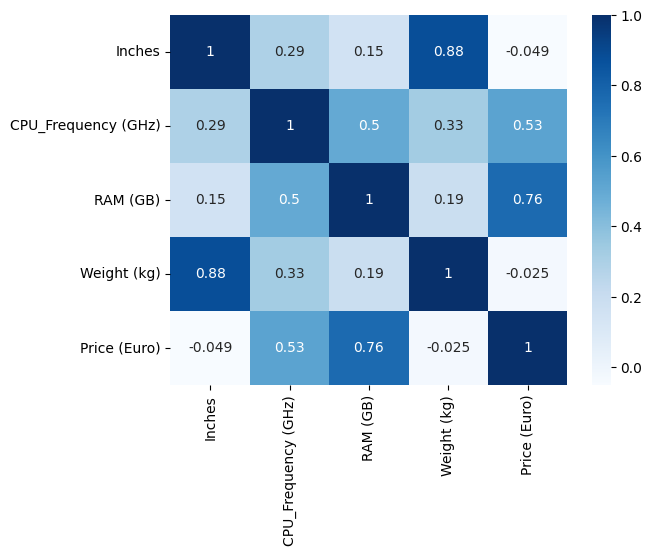

In [8]:
# Построим тепловую карту для матрицы корреляций Спирмена
sns.heatmap(df[['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)', 'Price (Euro)']].corr(method='spearman'), annot=True, cmap="Blues")

In [9]:
# Проверка значимости между весом и диагональю
r = spearmanr(df['Weight (kg)'], df['Inches'])
print('Коэффициент корреляции Спирмена между весом и диагональю ноутбука:', r[0], 'p-value:', r[1])
# p-value меньше уровня значимости, поэтому делаем вывод о статистической значимости
# Следовательно, можно утверждать, что при увеличении диагонали ноутбука его вес будет также увеличиваться

Коэффициент корреляции Спирмена между весом и диагональю ноутбука: 0.879323722034022 p-value: 0.0


In [10]:
# Проверяем связь между стоимостью ноутбука и его оперативной памятью
r = spearmanr(df['Price (Euro)'], df['RAM (GB)'])
print('Коэффициент корреляции Спирмена между стоимостью ноутбука и памятью:', r[0], 'p-value:', r[1])
# p-value меньше уровня значимости, поэтому делаем вывод о статистической значимости
# При увеличении оперативной памяти ноутбука его стоимость будет увеличиваться

Коэффициент корреляции Спирмена между стоимостью ноутбука и памятью: 0.7642484695916762 p-value: 9.301364561726322e-245


### Анализ корреляции категориальных признаков

In [11]:
# Для анализа категориальных признаков используются таблицы сопряженности и критерий хи-квадрат
# Проверим, есть ли связь между типом ноутбука и компанией, производящей графические процессоры
# Строим таблицу сопряженности при помощи функции crosstab
pd.crosstab(df['TypeName'], df['GPU_Company'])

GPU_Company,AMD,ARM,Intel,Nvidia
TypeName,,,,
2 in 1 Convertible,2,1,105,9
Gaming,7,0,0,198
Netbook,0,0,23,0
Notebook,152,0,409,146
Ultrabook,10,0,166,18
Workstation,3,0,1,25


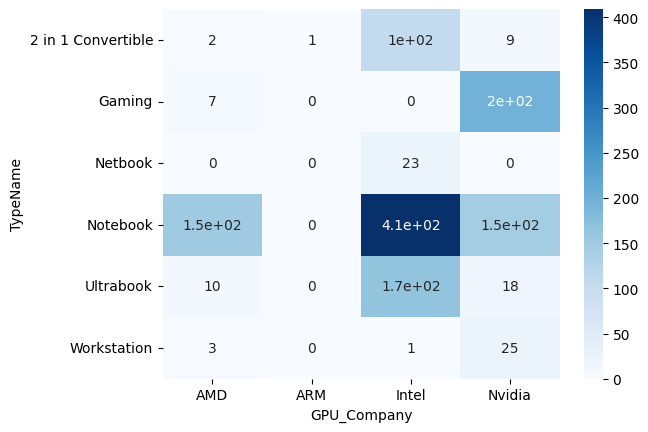

In [12]:
# Визуализируем таблицу сопряженности
sns.heatmap(pd.crosstab(df['TypeName'], df['GPU_Company']), cmap="Blues", annot=True);

In [13]:
# Проверяем связь при помощи критерия хи-квадрат
from scipy.stats import chi2_contingency # Испортируем функцию для расчета статистических показателей
r = chi2_contingency(pd.crosstab(df['TypeName'], df['GPU_Company']))
print('Значение статистики хи-квадрат:',r[0],'p-value:', r[1])
# p-value меньше уровня значимости (0,05), следовательно, связь между типом ноутбука и компанией, производящей графические процессоры подтверждается
# По значению статистики хи-квадрат можно делать сравнительные выводы: чем больше статистика, тем больше различие между группами

Значение статистики хи-квадрат: 671.3482543471513 p-value: 2.3625361706290534e-133


### Анализ корреляции категориальных и числовых признаков

In [14]:
# Рассмотрим связь числовой и дихотомической переменной (переменная, принимающая только два значения 0 или 1)
# Для формирования дихотомической переменной разделим модели ноутбуков следующим образом: легкий (до 2 кг) - 1, тяжелый (от 2 кг) - 0
# Формируем новую переменную is_light
df['is_light']=''
df.loc[df['Weight (kg)'] < 2, "is_light"] = 1
df.loc[df['Weight (kg)'] >= 2, "is_light"] = 0

In [15]:
# Для анализа связи используется бисериальный коэффициент корреляции
from scipy.stats import pointbiserialr
r = pointbiserialr(df['is_light'], df['Price (Euro)'])
print('Бисериальный коэффициент корреляции между стоимостью и весом ноутбука:', r[0], 'p-value:', r[1])
# Коэффициент равен 0.06, следовательно корреляции нет 
# p-value меньше уровня значимости, следовательно значимость коэффициента подтверждается

Бисериальный коэффициент корреляции между стоимостью и весом ноутбука: 0.06377652934068709 p-value: 0.02276457957513873


<Axes: xlabel='is_light', ylabel='Price (Euro)'>

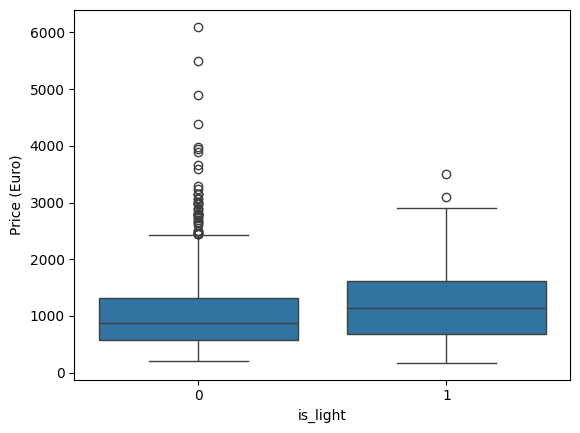

In [16]:
# Сравним распределения данных визуально
sns.boxplot(data=df, x="is_light", y="Price (Euro)")
# Заметим, что медианы двух категорий располагаются достаточно близко, видимых отличий нет 

### Задание  
Провести корреляционный анализ данных об успеваемости студентов на экзамене: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors. Определить топ 5 факторов, влияющих на успешную оценку (оценка считается успешной от 70-ти баллов).